In [45]:
import torch    
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm 

In [8]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [9]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4107030.01it/s]


Extracting ./datasets\MNIST\raw\train-images-idx3-ubyte.gz to ./datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 204974.27it/s]


Extracting ./datasets\MNIST\raw\train-labels-idx1-ubyte.gz to ./datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1764676.67it/s]


Extracting ./datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to ./datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4504736.05it/s]

Extracting ./datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./datasets\MNIST\raw



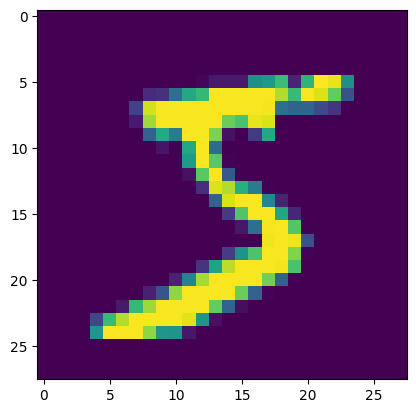

In [14]:
ds_mnist[0][0].numpy()[0].shape
plt.imshow(ds_mnist[0][0].numpy()[0])

In [15]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(
    ds_mnist, batch_size=batch_size, 
    shuffle=True, num_workers=1, drop_last=True
)

In [18]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [54]:
class Neural_numbers(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28 * 28, 100)
        self.linear2 = nn.Linear(100, 10)

        self.act = nn.ReLU()

    def forward(self, x):
        out = self.flat(x) 
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)

        return out

In [65]:
model = Neural_numbers()

In [66]:
loss_fn = nn.CrossEntropyLoss()

In [67]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [68]:
def count_parametrs(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [69]:
count_parametrs(model)

79510

In [70]:
def accuracy(pred, label):
    answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
    # print(answer)
    # print(answer.sum())
    return answer.mean()


In [71]:
epochs = 10
for epoch in range(epochs):
    loss_val = 0
    acc_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        
        label = F.one_hot(label, 10).float()
        pred = model(img)

        loss = loss_fn(pred, label)
        loss.backward()
        loss_item = loss.item()
        loss_val += loss_item

        optimizer.step()

        acc_current = accuracy(pred, label)
        acc_val += acc_current

        pbar.set_description(f'loss: {loss_item:.4f}\taccuracy: {acc_current:.3f}')
    print(loss_val/len(dataloader))
    print(acc_val/len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]C:\Users\Administrator\AppData\Local\Temp\ipykernel_584\3440098169.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.3947	accuracy: 0.875: 100%|██████████| 3750/3750 [00:14<00:00, 264.60it/s]


0.6431190971473852
0.8451


loss: 0.3293	accuracy: 0.938: 100%|██████████| 3750/3750 [00:13<00:00, 271.77it/s]


0.3114439806456367
0.9115333333333333


loss: 0.2463	accuracy: 0.938: 100%|██████████| 3750/3750 [00:14<00:00, 266.81it/s]


0.26295075593938433
0.9257666666666666


loss: 0.3077	accuracy: 0.938: 100%|██████████| 3750/3750 [00:15<00:00, 245.71it/s]


0.22964043648540974
0.9354666666666667


loss: 0.0895	accuracy: 1.000: 100%|██████████| 3750/3750 [00:16<00:00, 231.94it/s]


0.20323183369264006
0.9428


loss: 0.0348	accuracy: 1.000: 100%|██████████| 3750/3750 [00:15<00:00, 248.24it/s]


0.18125408539647858
0.94875


loss: 0.3018	accuracy: 0.812: 100%|██████████| 3750/3750 [00:15<00:00, 249.56it/s]


0.1645934742378692
0.9538333333333333


loss: 0.0448	accuracy: 1.000: 100%|██████████| 3750/3750 [00:16<00:00, 226.21it/s]


0.150052652205651
0.95835


loss: 0.1133	accuracy: 0.938: 100%|██████████| 3750/3750 [00:15<00:00, 237.86it/s]


0.13801529107717797
0.9611333333333333


loss: 0.0103	accuracy: 1.000: 100%|██████████| 3750/3750 [00:15<00:00, 235.10it/s]

0.127349972603408
0.96455


In [64]:
accuracy(pred, label)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_584\3440098169.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


0.875

In [153]:
image = cv2.imread('example.png', cv2.IMREAD_GRAYSCALE)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=0)
image = image.astype(np.float32)/255.0
image.shape

(1, 1, 28, 28)

In [154]:
t_image = torch.from_numpy(image)
castom_pred = model(t_image)

In [156]:
F.softmax(castom_pred).detach().numpy().argmax()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_584\3972890970.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(castom_pred).detach().numpy().argmax()


5